In [1]:
!pip install xgboost 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv("Sales_Data.csv")

In [4]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df.shape

(8523, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#Categorical Features:
''' 1) Item_Identifier
    2) Item_Fat_Content 
    3) Item_Type
    4) Outlet_Identifier
    5) Outlet_Size
    6) Outlet_Location_Type
    7) Outlet_Type '''


In [8]:
# checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing values 

Mean ---> average value (used to replace NaN in numerical features)
More ----> most repeated values (used to replace NaN in categorical features)

In [9]:
# mean value of Item_Weight column
df['Item_Weight'].mean()

12.857645184136183

In [10]:
# filling the missing values in Item Weight column with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [11]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Replacing missing values in Outlet_size with mode

In [12]:
mode_outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [13]:
mode_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [14]:
missing_values = df['Outlet_Size'].isnull()

In [15]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [16]:
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_outlet_size[x])

In [17]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [18]:
# statistical measures about data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
sns.set()

C:\Users\gunav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

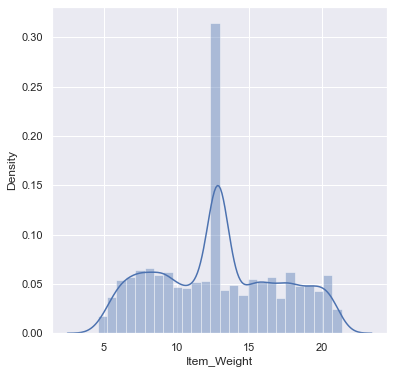

In [20]:
# Item Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
#plt.show()

C:\Users\gunav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

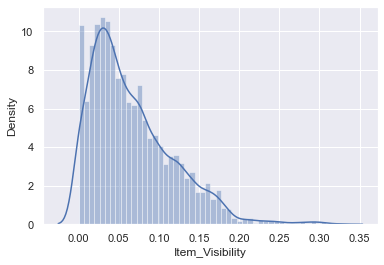

In [21]:
# Item Visibility 
sns.distplot(df['Item_Visibility'])

C:\Users\gunav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

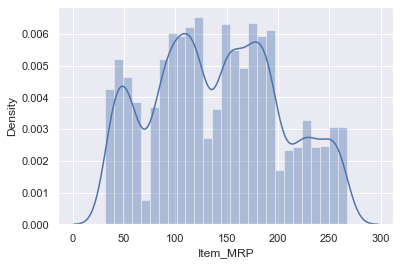

In [22]:
sns.distplot(df['Item_MRP'])

C:\Users\gunav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

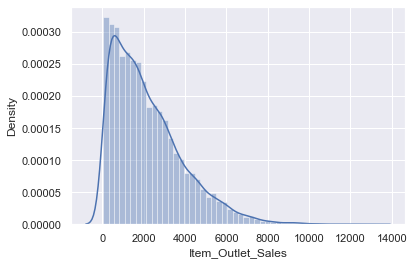

In [23]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

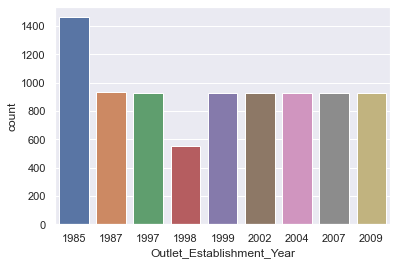

In [24]:
sns.countplot(x='Outlet_Establishment_Year', data=df)

Categorical Features 

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

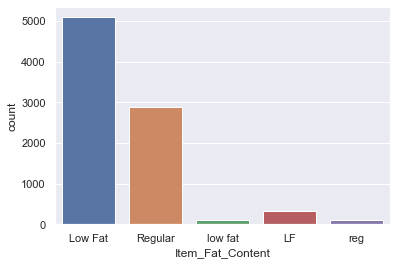

In [25]:
sns.countplot(x='Item_Fat_Content', data=df)

In above plot we can see that Low Fat, low fat and LF are all same types so we need to process this feature data to bring them all together

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

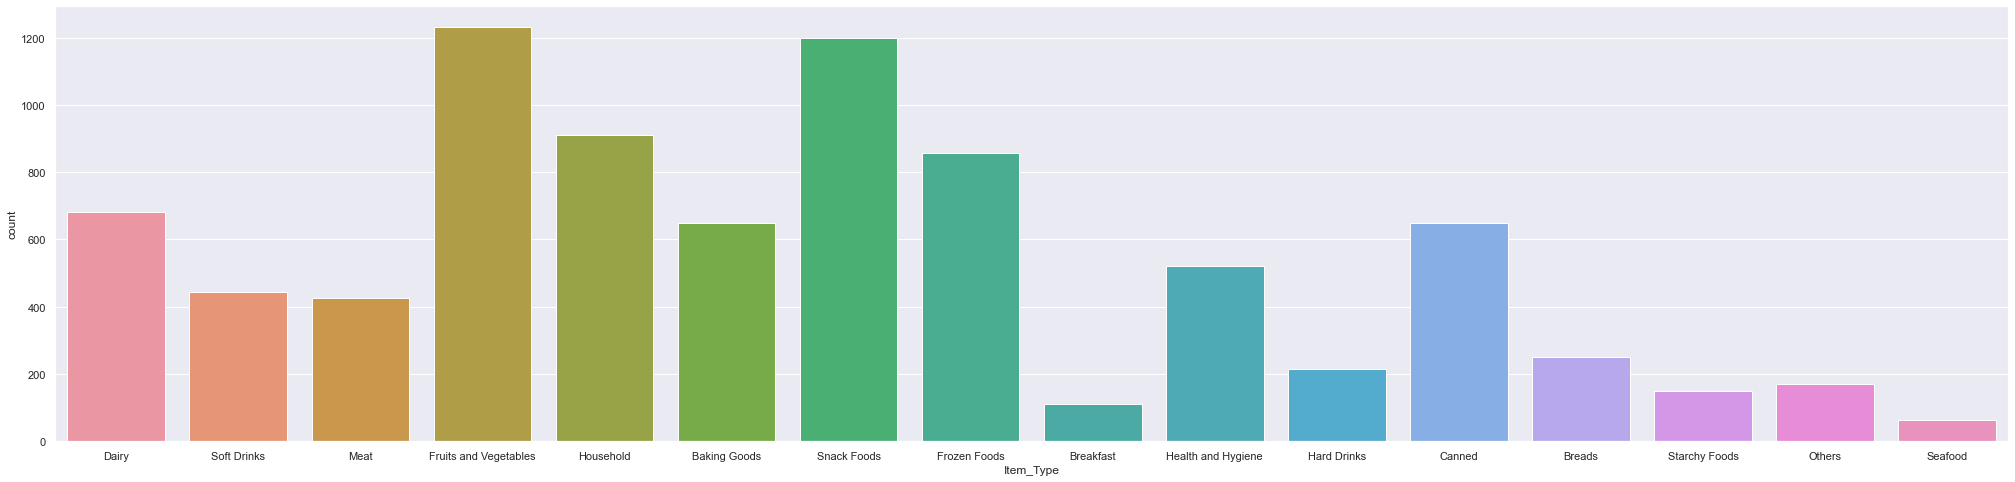

In [26]:
plt.figure(figsize=(35,8))
sns.countplot(x='Item_Type', data=df)

In [27]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

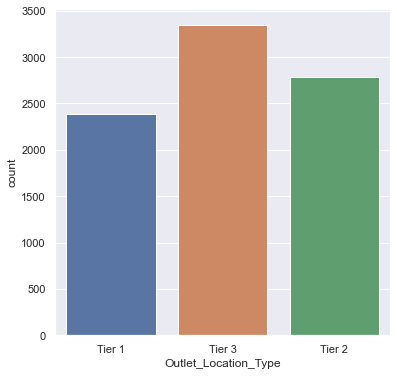

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=df)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

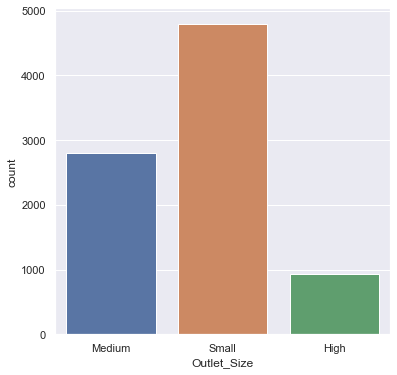

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)

Data Preprocessing

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


we can't feed categorical values to ML model so first I need to convert it to numerical values.
For that I am using LabelEncoder

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [32]:
df.replace({'Item_Fat_Content' : {'low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [33]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoder

In [34]:
encoder = LabelEncoder()

In [35]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and Target

In [37]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

In [38]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [39]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into training data and testing data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [41]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Machine Learning Model Training

In [42]:
regressor = XGBRegressor(
            max_depth=3,
            n_estimators=200,
            learning_rate=0.05,
            reg_alpha=1,
            reg_lambda=1
)

In [43]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

In [44]:
training_data_prediction = regressor.predict(X_train)

In [45]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [46]:
print(r2_train)

0.6344515091104856


In [47]:
test_data_prediction = regressor.predict(X_test)

In [48]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [49]:
print(r2_test)

0.5890629903488949


In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
model = XGBRegressor(random_state=3)

In [59]:
feat = {
    'max_depth' : [3,5,7,9],
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'n_estimators' : [100, 200, 300, 500],
    'subsample' : [0.6, 0.8, 1.0],
    'colsample_bytree' : [0.6, 0.8, 1.0],
    'min_child_weight' : [0, 0.1, 0.5, 1],
    'reg_alpha' : [0, 0.1, 0.5, 1],
    'reg_lambda' : [1, 5, 10]
}

In [60]:
random_search = RandomizedSearchCV(
    estimator = model,
    param_distributions=feat,
    n_iter=50,
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=3,
    n_jobs=-1
)

random_search.fit(X_train, Y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=3, ...),
                   

In [61]:
print("Best Parameters : ", random_search.best_params_)

Best Parameters :  {'subsample': 0.6, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 0.1, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [62]:
print("Best R^2 Score : ", random_search.best_score_)

Best R^2 Score :  0.6026521537727169


lets train Light Gradient Boost model

In [63]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [64]:
import lightgbm as lgb

In [65]:
from sklearn.model_selection import cross_val_score

In [82]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=2,
    num_leaves=45,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=2
)

In [83]:
lgb_model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1041
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 2167.583481
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.05, max_depth=2,
              n_estimators=300, num_leaves=45, random_state=2, subsample=0.8)

In [84]:
lgb_r2 = lgb_model.score(X_test, Y_test)
print("LightGBM R^2 Score : ", lgb_r2)

LightGBM R^2 Score :  0.590757866631848


Lets Implement CatBoost Regressor

In [70]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [71]:
from catboost import CatBoostRegressor

In [72]:
cat_model = CatBoostRegressor()

In [73]:
cat_model.fit(X_train, Y_train, eval_set=(X_test, Y_test))

Learning rate set to 0.06883
0:	learn: 1628.8248101	test: 1695.3129836	best: 1695.3129836 (0)	total: 143ms	remaining: 2m 22s
1:	learn: 1569.8484887	test: 1637.5780610	best: 1637.5780610 (1)	total: 146ms	remaining: 1m 12s
2:	learn: 1518.9079756	test: 1586.3381631	best: 1586.3381631 (2)	total: 148ms	remaining: 49.1s
3:	learn: 1471.3236641	test: 1538.7973448	best: 1538.7973448 (3)	total: 149ms	remaining: 37.2s
4:	learn: 1428.3844435	test: 1496.6551370	best: 1496.6551370 (4)	total: 151ms	remaining: 30.1s
5:	learn: 1389.8967916	test: 1458.7194428	best: 1458.7194428 (5)	total: 153ms	remaining: 25.4s
6:	learn: 1353.8651298	test: 1424.0544900	best: 1424.0544900 (6)	total: 155ms	remaining: 22s
7:	learn: 1322.7935450	test: 1392.9312094	best: 1392.9312094 (7)	total: 156ms	remaining: 19.4s
8:	learn: 1294.6308457	test: 1365.9633427	best: 1365.9633427 (8)	total: 158ms	remaining: 17.4s
9:	learn: 1268.4148346	test: 1340.8995169	best: 1340.8995169 (9)	total: 160ms	remaining: 15.8s
10:	learn: 1244.64319

125:	learn: 1010.8177315	test: 1130.5995972	best: 1130.2494780 (102)	total: 351ms	remaining: 2.43s
126:	learn: 1010.6155619	test: 1130.4915810	best: 1130.2494780 (102)	total: 353ms	remaining: 2.42s
127:	learn: 1009.9963678	test: 1130.5365390	best: 1130.2494780 (102)	total: 355ms	remaining: 2.42s
128:	learn: 1009.3702559	test: 1130.3460430	best: 1130.2494780 (102)	total: 356ms	remaining: 2.4s
129:	learn: 1008.9505934	test: 1130.5944744	best: 1130.2494780 (102)	total: 358ms	remaining: 2.4s
130:	learn: 1008.6957132	test: 1130.6905860	best: 1130.2494780 (102)	total: 360ms	remaining: 2.39s
131:	learn: 1008.1590202	test: 1130.5153069	best: 1130.2494780 (102)	total: 362ms	remaining: 2.38s
132:	learn: 1007.5745684	test: 1130.8032012	best: 1130.2494780 (102)	total: 363ms	remaining: 2.37s
133:	learn: 1007.3509154	test: 1130.8667402	best: 1130.2494780 (102)	total: 365ms	remaining: 2.36s
134:	learn: 1007.1390634	test: 1130.7204345	best: 1130.2494780 (102)	total: 367ms	remaining: 2.35s
135:	learn: 

234:	learn: 966.6979051	test: 1131.4578695	best: 1129.5013959 (182)	total: 526ms	remaining: 1.71s
235:	learn: 966.1540483	test: 1131.3437768	best: 1129.5013959 (182)	total: 528ms	remaining: 1.71s
236:	learn: 965.8449022	test: 1131.4052602	best: 1129.5013959 (182)	total: 529ms	remaining: 1.7s
237:	learn: 965.2407590	test: 1131.4058978	best: 1129.5013959 (182)	total: 531ms	remaining: 1.7s
238:	learn: 964.9161970	test: 1131.3295442	best: 1129.5013959 (182)	total: 533ms	remaining: 1.7s
239:	learn: 964.5535896	test: 1131.3604680	best: 1129.5013959 (182)	total: 534ms	remaining: 1.69s
240:	learn: 964.3421337	test: 1131.4210294	best: 1129.5013959 (182)	total: 542ms	remaining: 1.71s
241:	learn: 964.1112302	test: 1131.5438889	best: 1129.5013959 (182)	total: 545ms	remaining: 1.71s
242:	learn: 963.6950886	test: 1131.8513931	best: 1129.5013959 (182)	total: 546ms	remaining: 1.7s
243:	learn: 963.2505078	test: 1131.8941925	best: 1129.5013959 (182)	total: 548ms	remaining: 1.7s
244:	learn: 963.0590165	t

335:	learn: 928.7051184	test: 1139.3063058	best: 1129.5013959 (182)	total: 701ms	remaining: 1.38s
336:	learn: 928.1492231	test: 1139.3178826	best: 1129.5013959 (182)	total: 703ms	remaining: 1.38s
337:	learn: 927.8483844	test: 1139.3890215	best: 1129.5013959 (182)	total: 704ms	remaining: 1.38s
338:	learn: 927.4690174	test: 1139.3191236	best: 1129.5013959 (182)	total: 706ms	remaining: 1.38s
339:	learn: 927.1227295	test: 1139.3443152	best: 1129.5013959 (182)	total: 708ms	remaining: 1.37s
340:	learn: 926.8969416	test: 1139.3379181	best: 1129.5013959 (182)	total: 710ms	remaining: 1.37s
341:	learn: 926.6656516	test: 1139.4147489	best: 1129.5013959 (182)	total: 711ms	remaining: 1.37s
342:	learn: 926.3843700	test: 1139.7226797	best: 1129.5013959 (182)	total: 713ms	remaining: 1.36s
343:	learn: 925.9608155	test: 1140.1154125	best: 1129.5013959 (182)	total: 715ms	remaining: 1.36s
344:	learn: 925.6392602	test: 1140.4257935	best: 1129.5013959 (182)	total: 716ms	remaining: 1.36s
345:	learn: 925.1600

442:	learn: 892.3945123	test: 1142.7158959	best: 1129.5013959 (182)	total: 878ms	remaining: 1.1s
443:	learn: 892.0952318	test: 1142.7235442	best: 1129.5013959 (182)	total: 880ms	remaining: 1.1s
444:	learn: 891.6502920	test: 1142.7670592	best: 1129.5013959 (182)	total: 882ms	remaining: 1.1s
445:	learn: 891.2873860	test: 1142.9543782	best: 1129.5013959 (182)	total: 883ms	remaining: 1.1s
446:	learn: 890.8226297	test: 1142.8656960	best: 1129.5013959 (182)	total: 885ms	remaining: 1.09s
447:	learn: 890.4522885	test: 1142.7572301	best: 1129.5013959 (182)	total: 887ms	remaining: 1.09s
448:	learn: 890.1371238	test: 1142.9431167	best: 1129.5013959 (182)	total: 890ms	remaining: 1.09s
449:	learn: 889.9056152	test: 1143.0357212	best: 1129.5013959 (182)	total: 891ms	remaining: 1.09s
450:	learn: 889.7333703	test: 1143.0562850	best: 1129.5013959 (182)	total: 893ms	remaining: 1.09s
451:	learn: 889.4683298	test: 1142.9573185	best: 1129.5013959 (182)	total: 895ms	remaining: 1.08s
452:	learn: 889.1084691	

536:	learn: 865.6209709	test: 1145.1951889	best: 1129.5013959 (182)	total: 1.05s	remaining: 906ms
537:	learn: 865.3343229	test: 1145.2178903	best: 1129.5013959 (182)	total: 1.05s	remaining: 904ms
538:	learn: 865.0509344	test: 1145.3592343	best: 1129.5013959 (182)	total: 1.05s	remaining: 902ms
539:	learn: 864.6235567	test: 1145.3257593	best: 1129.5013959 (182)	total: 1.06s	remaining: 900ms
540:	learn: 864.4363203	test: 1145.4421160	best: 1129.5013959 (182)	total: 1.06s	remaining: 898ms
541:	learn: 864.1580751	test: 1145.3150280	best: 1129.5013959 (182)	total: 1.06s	remaining: 896ms
542:	learn: 863.9743311	test: 1145.4274536	best: 1129.5013959 (182)	total: 1.06s	remaining: 893ms
543:	learn: 863.5169874	test: 1145.3812188	best: 1129.5013959 (182)	total: 1.06s	remaining: 891ms
544:	learn: 863.3631035	test: 1145.3039549	best: 1129.5013959 (182)	total: 1.06s	remaining: 889ms
545:	learn: 862.8858152	test: 1145.3228226	best: 1129.5013959 (182)	total: 1.07s	remaining: 887ms
546:	learn: 862.5204

645:	learn: 837.9956864	test: 1147.6726629	best: 1129.5013959 (182)	total: 1.23s	remaining: 672ms
646:	learn: 837.7751544	test: 1147.7357046	best: 1129.5013959 (182)	total: 1.23s	remaining: 670ms
647:	learn: 837.5751506	test: 1147.8580952	best: 1129.5013959 (182)	total: 1.23s	remaining: 668ms
648:	learn: 837.5075106	test: 1147.8681968	best: 1129.5013959 (182)	total: 1.23s	remaining: 666ms
649:	learn: 837.2819078	test: 1147.9072770	best: 1129.5013959 (182)	total: 1.23s	remaining: 664ms
650:	learn: 837.0658318	test: 1147.6604071	best: 1129.5013959 (182)	total: 1.24s	remaining: 662ms
651:	learn: 836.9336668	test: 1147.6207410	best: 1129.5013959 (182)	total: 1.24s	remaining: 660ms
652:	learn: 836.7142062	test: 1147.6180560	best: 1129.5013959 (182)	total: 1.24s	remaining: 658ms
653:	learn: 836.4232533	test: 1147.6051580	best: 1129.5013959 (182)	total: 1.24s	remaining: 656ms
654:	learn: 836.0888185	test: 1147.7427825	best: 1129.5013959 (182)	total: 1.24s	remaining: 654ms
655:	learn: 835.7192

749:	learn: 813.5632891	test: 1151.2977843	best: 1129.5013959 (182)	total: 1.4s	remaining: 468ms
750:	learn: 813.3688726	test: 1151.3606465	best: 1129.5013959 (182)	total: 1.41s	remaining: 466ms
751:	learn: 813.0209931	test: 1151.8947740	best: 1129.5013959 (182)	total: 1.41s	remaining: 464ms
752:	learn: 812.8940088	test: 1151.8579001	best: 1129.5013959 (182)	total: 1.41s	remaining: 462ms
753:	learn: 812.7196244	test: 1151.9623761	best: 1129.5013959 (182)	total: 1.41s	remaining: 460ms
754:	learn: 812.5501206	test: 1151.9863788	best: 1129.5013959 (182)	total: 1.41s	remaining: 458ms
755:	learn: 812.3037112	test: 1151.9355868	best: 1129.5013959 (182)	total: 1.41s	remaining: 457ms
756:	learn: 812.0783428	test: 1151.9894692	best: 1129.5013959 (182)	total: 1.42s	remaining: 455ms
757:	learn: 811.8971010	test: 1152.0625967	best: 1129.5013959 (182)	total: 1.42s	remaining: 453ms
758:	learn: 811.6768413	test: 1152.2972812	best: 1129.5013959 (182)	total: 1.42s	remaining: 451ms
759:	learn: 811.52599

857:	learn: 791.4245074	test: 1156.0356254	best: 1129.5013959 (182)	total: 1.58s	remaining: 261ms
858:	learn: 791.2058631	test: 1156.1242380	best: 1129.5013959 (182)	total: 1.58s	remaining: 260ms
859:	learn: 791.0499480	test: 1156.0285838	best: 1129.5013959 (182)	total: 1.58s	remaining: 258ms
860:	learn: 790.8506745	test: 1156.1655312	best: 1129.5013959 (182)	total: 1.58s	remaining: 256ms
861:	learn: 790.7269321	test: 1156.1844984	best: 1129.5013959 (182)	total: 1.59s	remaining: 254ms
862:	learn: 790.4789256	test: 1156.3786117	best: 1129.5013959 (182)	total: 1.59s	remaining: 252ms
863:	learn: 790.2983372	test: 1156.2979465	best: 1129.5013959 (182)	total: 1.59s	remaining: 250ms
864:	learn: 790.2244577	test: 1156.2944728	best: 1129.5013959 (182)	total: 1.59s	remaining: 248ms
865:	learn: 789.9930381	test: 1156.3986384	best: 1129.5013959 (182)	total: 1.59s	remaining: 247ms
866:	learn: 789.8591788	test: 1156.5360273	best: 1129.5013959 (182)	total: 1.59s	remaining: 245ms
867:	learn: 789.7424

965:	learn: 769.2046472	test: 1160.0299506	best: 1129.5013959 (182)	total: 1.75s	remaining: 61.8ms
966:	learn: 769.0513357	test: 1160.0443804	best: 1129.5013959 (182)	total: 1.76s	remaining: 60ms
967:	learn: 768.9214128	test: 1160.0278933	best: 1129.5013959 (182)	total: 1.76s	remaining: 58.1ms
968:	learn: 768.7320296	test: 1159.9611525	best: 1129.5013959 (182)	total: 1.76s	remaining: 56.3ms
969:	learn: 768.4398069	test: 1159.8727566	best: 1129.5013959 (182)	total: 1.76s	remaining: 54.5ms
970:	learn: 768.2883189	test: 1159.9086482	best: 1129.5013959 (182)	total: 1.76s	remaining: 52.7ms
971:	learn: 768.1703511	test: 1160.0797613	best: 1129.5013959 (182)	total: 1.76s	remaining: 50.9ms
972:	learn: 767.9795967	test: 1160.1182520	best: 1129.5013959 (182)	total: 1.77s	remaining: 49ms
973:	learn: 767.7462333	test: 1160.0176466	best: 1129.5013959 (182)	total: 1.77s	remaining: 47.2ms
974:	learn: 767.6339591	test: 1160.0238388	best: 1129.5013959 (182)	total: 1.77s	remaining: 45.4ms
975:	learn: 76

In [74]:
cat_r2 = cat_model.score(X_test, Y_test)
print("CatBoost R^2 Score : ", cat_r2)

CatBoost R^2 Score :  0.5867371156511301


In [75]:
lgb_preds = lgb_model.predict(X_test)
cat_preds = cat_model.predict(X_test)

# Metrics
from sklearn.metrics import r2_score, mean_squared_error

print("LightGBM:")
print(f"R^2 Score: {r2_score(Y_test, lgb_preds):.4f}")
print(f"RMSE: {mean_squared_error(Y_test, lgb_preds, squared=False):.4f}")

print("\nCatBoost:")
print(f"R^2 Score: {r2_score(Y_test, cat_preds):.4f}")
print(f"RMSE: {mean_squared_error(Y_test, cat_preds, squared=False):.4f}")

LightGBM:
R^2 Score: 0.5900
RMSE: 1125.1004

CatBoost:
R^2 Score: 0.5867
RMSE: 1129.5014


In [85]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052
